# Exploring Genomics Data

This notebook demonstrates working with sample gene data stored as publicly accessible BigQuery datasets as part of Genomics on Google Cloud Platform.

In [1]:
import gcp.bigquery as bq

# Exploring the Personal Genome Project dataset

First let's look at the table of phenotypes that we want to explore here.

In [2]:
phenotypes = bq.Table('google.com:biggene:pgp.phenotypes')
phenotypes.schema

[{ 'name': 'Participant', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Year_of_birth', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Which_statement_best_describes_you', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Severe_disease_or_rare_genetic_trait', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Onset', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Rarity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Severity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Relative_enrollment', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Diagnosis', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Genetic_confirmation', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Disease_trait_Documentation', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Sex_Gender', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Race_ethnicity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Maternal_grandmother_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Paternal_grandmother_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Paternal_grandfather_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Maternal_grandfather_Country_of_origin', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_relatives', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_older_individuals', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrollment_of_parents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Monozygotic_Identical_twins', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Parents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Siblings_Fraternal_twins', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Children', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Grandparents', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Grandchildren', 'type': 'BOOLEAN', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Aunts_Uncles', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Nephews_Nieces', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Half_siblings', 'type': 'BOOLEAN', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Cousins_or_more_distant', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Enrolled_relatives_Not_genetically_related_e_g_husband_wife', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Are_all_your_enrolled_relatives_linked_to_your_PGP_profile', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_uploaded_genetic_data_to_your_PGP_participant_profile', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_used_the_PGP_web_interface_to_record_a_designated_proxy', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Have_you_uploaded_health_record_data_using_our_Google_Health_or_Microsoft_Healthvault_interfaces', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Uploaded_health_records_Update_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Uploaded_health_records_Extensiveness', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'Blood

We can see a number of fields that provide details for a given participant's genome, such as the existence of certain diseases/conditions (e.g., has_Asthma) as well as the participant's heritage (e.g., Maternal_grandfather_Country_of_origin).

Let's look at a few rows from the table for a few phenotype attributes of interest.

In [3]:
phenotypes.sample(fields=['Participant',
                          'Sex_Gender',
                          'Year_of_birth',
                          'Maternal_grandmother_Country_of_origin',
                          'Maternal_grandfather_Country_of_origin'])

(rows: 5, time: 3.7s, 123KB processed, job: job_A5fWHb2x_rmp3pKaQ3nEhrlmynk)

## Querying

Let's dig further into the phenotypes table and get some statistics on the occurrence of asthma among the participants present within the dataset.

In [4]:
%%sql --module asthma
SELECT Participant,
       IFNULL(Sex_Gender, 'Unknown') AS gender,
       IF(has_Asthma IS NULL, 0, 1) AS asthma
FROM $source

In [5]:
bq.Query(asthma, source=phenotypes).results().to_dataframe()[:5]

,Participant,gender,asthma
0,huBFBBD8,Male,0
1,hu5880D9,Female,0
2,hu9367D1,Male,0
3,hu57850F,Female,0
4,hu1069B0,Female,0


## Summarizing

Now that we've seen the structure of the rows generated by our `$asthma` query, let's summarize the results by computing the percentage of the overall dataset having asthma. We can accomplish this by nesting our previous query within an outer `SELECT` statement.

In [6]:
%%sql --module summary
SELECT ROUND(AVG(asthma) * 100, 2) AS percent_has_asthma FROM $asthma

In [7]:
bq.Query(summary, source=phenotypes, asthma=asthma).results()

(rows: 1, time: 1.1s, 199B processed, job: job_QPA_bs8j9sGgzbNjHClUvRnEFG0)

Let's further refine our `$asthma` query and compute the average occurrence broken down by gender this time.

In [8]:
%%sql --module genders
SELECT gender,
       ROUND(AVG(asthma) * 100, 2) AS percent_has_asthma
FROM $asthma
GROUP BY gender

In [9]:
bq.Query(genders, source=phenotypes, asthma=asthma).results()

(rows: 4, time: 2.7s, 14KB processed, job: job_2xaoqZYv6S3c0Mn31l30-zPjkSk)

Looks like there are almost twice as many female (versus male) genomes with the asthma phenotype in this dataset.

## Visualization

Lets visualize the data, first by creating a Pandas DataFrame, and then using the plotting API on DataFrame, that in turn builds on matplotlib.

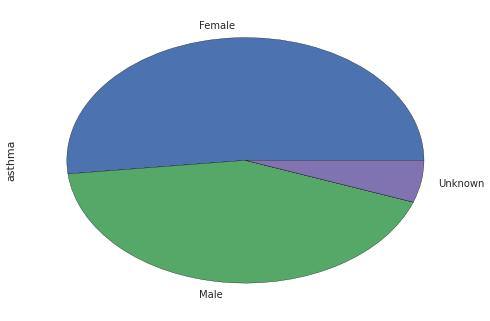

In [10]:
df = bq.Query(asthma, source=phenotypes).to_dataframe()

segments = df.groupby('gender').sum()
segments.plot(kind='pie', y='asthma', legend=False)

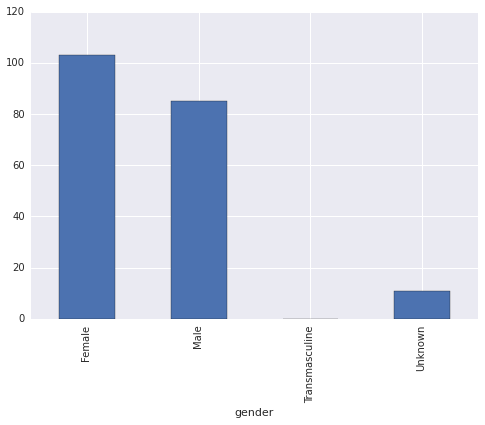

In [11]:
segments.plot(kind='bar', y='asthma', legend=False)